In [53]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [54]:
df = pd.read_csv("./Data/sensor_fault_detection.csv")
df

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Wafer-896,3013.66,2526.44,2185.2111,1141.6306,0.8447,100.0,100.5978,0.1217,1.5337,...,NaN,0.5013,0.0076,0.0021,1.5152,0.0153,0.0048,0.0017,31.0176,-1
96,Wafer-897,2982.87,2477.01,2315.2667,2360.1325,1.1259,100.0,90.1144,0.1160,1.4695,...,NaN,0.5003,0.0106,0.0028,2.1263,0.0153,0.0048,0.0017,31.0176,1
97,Wafer-898,3084.82,2387.42,2171.5000,1028.4440,0.7899,100.0,101.5122,0.1224,1.3603,...,NaN,0.5016,0.0130,0.0028,2.5865,0.0153,0.0048,0.0017,31.0176,-1
98,Wafer-899,2955.87,2541.89,NaN,NaN,NaN,NaN,NaN,NaN,1.4493,...,NaN,0.5023,0.0140,0.0033,2.7810,0.0153,0.0048,0.0017,31.0176,-1


In [55]:
df.shape

(100, 592)

In [56]:
df.rename(columns= {"Unnamed: 0":"Wafer"},inplace=True)

In [57]:
df

,Wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Wafer-896,3013.66,2526.44,2185.2111,1141.6306,0.8447,100.0,100.5978,0.1217,1.5337,...,NaN,0.5013,0.0076,0.0021,1.5152,0.0153,0.0048,0.0017,31.0176,-1
96,Wafer-897,2982.87,2477.01,2315.2667,2360.1325,1.1259,100.0,90.1144,0.1160,1.4695,...,NaN,0.5003,0.0106,0.0028,2.1263,0.0153,0.0048,0.0017,31.0176,1
97,Wafer-898,3084.82,2387.42,2171.5000,1028.4440,0.7899,100.0,101.5122,0.1224,1.3603,...,NaN,0.5016,0.0130,0.0028,2.5865,0.0153,0.0048,0.0017,31.0176,-1
98,Wafer-899,2955.87,2541.89,NaN,NaN,NaN,NaN,NaN,NaN,1.4493,...,NaN,0.5023,0.0140,0.0033,2.7810,0.0153,0.0048,0.0017,31.0176,-1


In [58]:
from sklearn.model_selection import train_test_split

df, df_test = train_test_split(df,test_size=0.2,random_state=42)

In [59]:
df.head()

,Wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,100.0,89.7222,0.1251,1.5762,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,100.0,102.3622,0.1208,1.4756,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.0,100.7744,0.1234,1.5590,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,100.0,99.2178,0.1221,1.4542,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.4958,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 55 to 51
Columns: 592 entries, Wafer to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 370.6+ KB


In [61]:
df_test.head()

,Wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
83,Wafer-884,2980.66,2437.21,2200.9889,1054.5240,1.3830,100.0,100.1800,0.1201,1.3713,...,NaN,0.4993,0.0117,0.0032,2.3514,0.0134,0.0121,0.0035,90.4575,-1
53,Wafer-854,3019.98,2515.63,2196.0000,1230.0293,0.7684,100.0,97.5578,0.1219,1.4919,...,104.3034,0.4968,0.0217,0.0053,4.3587,0.0133,0.0139,0.0038,104.3034,-1
70,Wafer-871,3066.38,2473.10,2171.5000,1028.4440,0.7899,100.0,101.5122,0.1224,1.3623,...,NaN,0.4998,0.0102,0.0031,2.0450,0.0218,0.0054,0.0020,24.6547,-1
45,Wafer-846,3078.60,2441.68,2213.5111,1183.4356,0.7531,100.0,103.0911,0.1199,1.5250,...,NaN,0.5009,0.0126,0.0031,2.5092,0.0117,0.0262,0.0089,223.1018,-1
44,Wafer-845,3123.02,2488.96,2240.8666,2048.2566,1.1620,100.0,86.3822,0.1233,1.5540,...,NaN,0.4948,0.0145,0.0036,2.9266,0.0117,0.0262,0.0089,223.1018,-1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 55 to 51
Columns: 592 entries, Wafer to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 370.6+ KB


In [63]:
df.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,79.000000,80.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,80.000000,80.000000,...,27.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,3019.048228,2494.058875,2202.758988,1519.467071,1.201382,100.0,96.881160,0.122158,1.460087,0.000946,...,63.785093,0.499493,0.013905,0.003591,2.785103,0.023543,0.014155,0.004439,72.116730,-0.850000
std,72.665372,68.166898,31.633772,471.962104,0.365870,0.0,5.520108,0.002062,0.072159,0.010865,...,30.722790,0.003683,0.004577,0.000908,0.923064,0.011668,0.007263,0.002324,50.770394,0.530106
min,2889.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.026500,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2975.425000,2452.517500,2189.966700,1111.543600,0.850075,100.0,93.547250,0.120800,1.409950,-0.005750,...,46.961400,0.497175,0.011500,0.003100,2.298350,0.013850,0.009000,0.002650,33.654025,-1.000000
50%,3004.390000,2502.445000,2200.955600,1308.647900,1.164250,100.0,99.217800,0.122150,1.451900,0.001500,...,54.476100,0.499450,0.012950,0.003400,2.577150,0.021800,0.013100,0.003800,59.082500,-1.000000
75%,3065.730000,2532.755000,2212.866700,1997.641600,1.383000,100.0,101.133300,0.123375,1.498675,0.009000,...,80.740300,0.501700,0.014950,0.003925,2.992300,0.028100,0.018400,0.005750,93.190025,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,103.091100,0.126200,1.641100,0.025000,...,151.193000,0.508700,0.043700,0.008900,8.816000,0.054500,0.033400,0.012000,223.101800,1.000000


In [64]:
df["Good/Bad"].info()

<class 'pandas.core.series.Series'>
Index: 80 entries, 55 to 51
Series name: Good/Bad
Non-Null Count  Dtype
--------------  -----
80 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


In [65]:
df["Good/Bad"].isnull().sum()

0

In [66]:
df.isnull().sum().sum()

1822

In [67]:
df.shape[0]

80

In [68]:
df.shape[1]

592

In [69]:
df

,Wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,100.0,89.7222,0.1251,1.5762,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,100.0,102.3622,0.1208,1.4756,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.0,100.7744,0.1234,1.5590,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,100.0,99.2178,0.1221,1.4542,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.4958,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Wafer-861,3071.05,2642.15,2200.9889,1054.5240,1.3830,100.0,100.1800,0.1201,1.4532,...,NaN,0.4973,0.0139,0.0039,2.7851,0.0122,0.0131,0.0039,107.5257,-1
71,Wafer-872,3043.18,2545.53,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.3824,...,NaN,0.4989,0.0131,0.0036,2.6253,0.0218,0.0054,0.0020,24.6547,-1
14,Wafer-815,3001.26,2519.92,2224.6778,1308.6479,1.3907,100.0,101.1333,0.1208,1.5172,...,48.4818,0.4959,0.0142,0.0037,2.8609,0.0278,0.0135,0.0042,48.4818,-1
92,Wafer-893,3007.00,2572.62,2213.2111,2070.7147,1.9705,100.0,87.7411,0.1232,1.4446,...,NaN,0.4987,0.0172,0.0041,3.4417,0.0195,0.0149,0.0047,76.0035,-1


In [70]:
#  the percentage of missing value

df.isnull().sum().sum()/ (df.shape[0]*df.shape[1]-1)*100

3.847209611689436

In [71]:
df_test.isnull().sum().sum()

484

In [72]:
df

,Wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,100.0,89.7222,0.1251,1.5762,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,100.0,102.3622,0.1208,1.4756,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.0,100.7744,0.1234,1.5590,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,100.0,99.2178,0.1221,1.4542,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.4958,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Wafer-861,3071.05,2642.15,2200.9889,1054.5240,1.3830,100.0,100.1800,0.1201,1.4532,...,NaN,0.4973,0.0139,0.0039,2.7851,0.0122,0.0131,0.0039,107.5257,-1
71,Wafer-872,3043.18,2545.53,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.3824,...,NaN,0.4989,0.0131,0.0036,2.6253,0.0218,0.0054,0.0020,24.6547,-1
14,Wafer-815,3001.26,2519.92,2224.6778,1308.6479,1.3907,100.0,101.1333,0.1208,1.5172,...,48.4818,0.4959,0.0142,0.0037,2.8609,0.0278,0.0135,0.0042,48.4818,-1
92,Wafer-893,3007.00,2572.62,2213.2111,2070.7147,1.9705,100.0,87.7411,0.1232,1.4446,...,NaN,0.4987,0.0172,0.0041,3.4417,0.0195,0.0149,0.0047,76.0035,-1


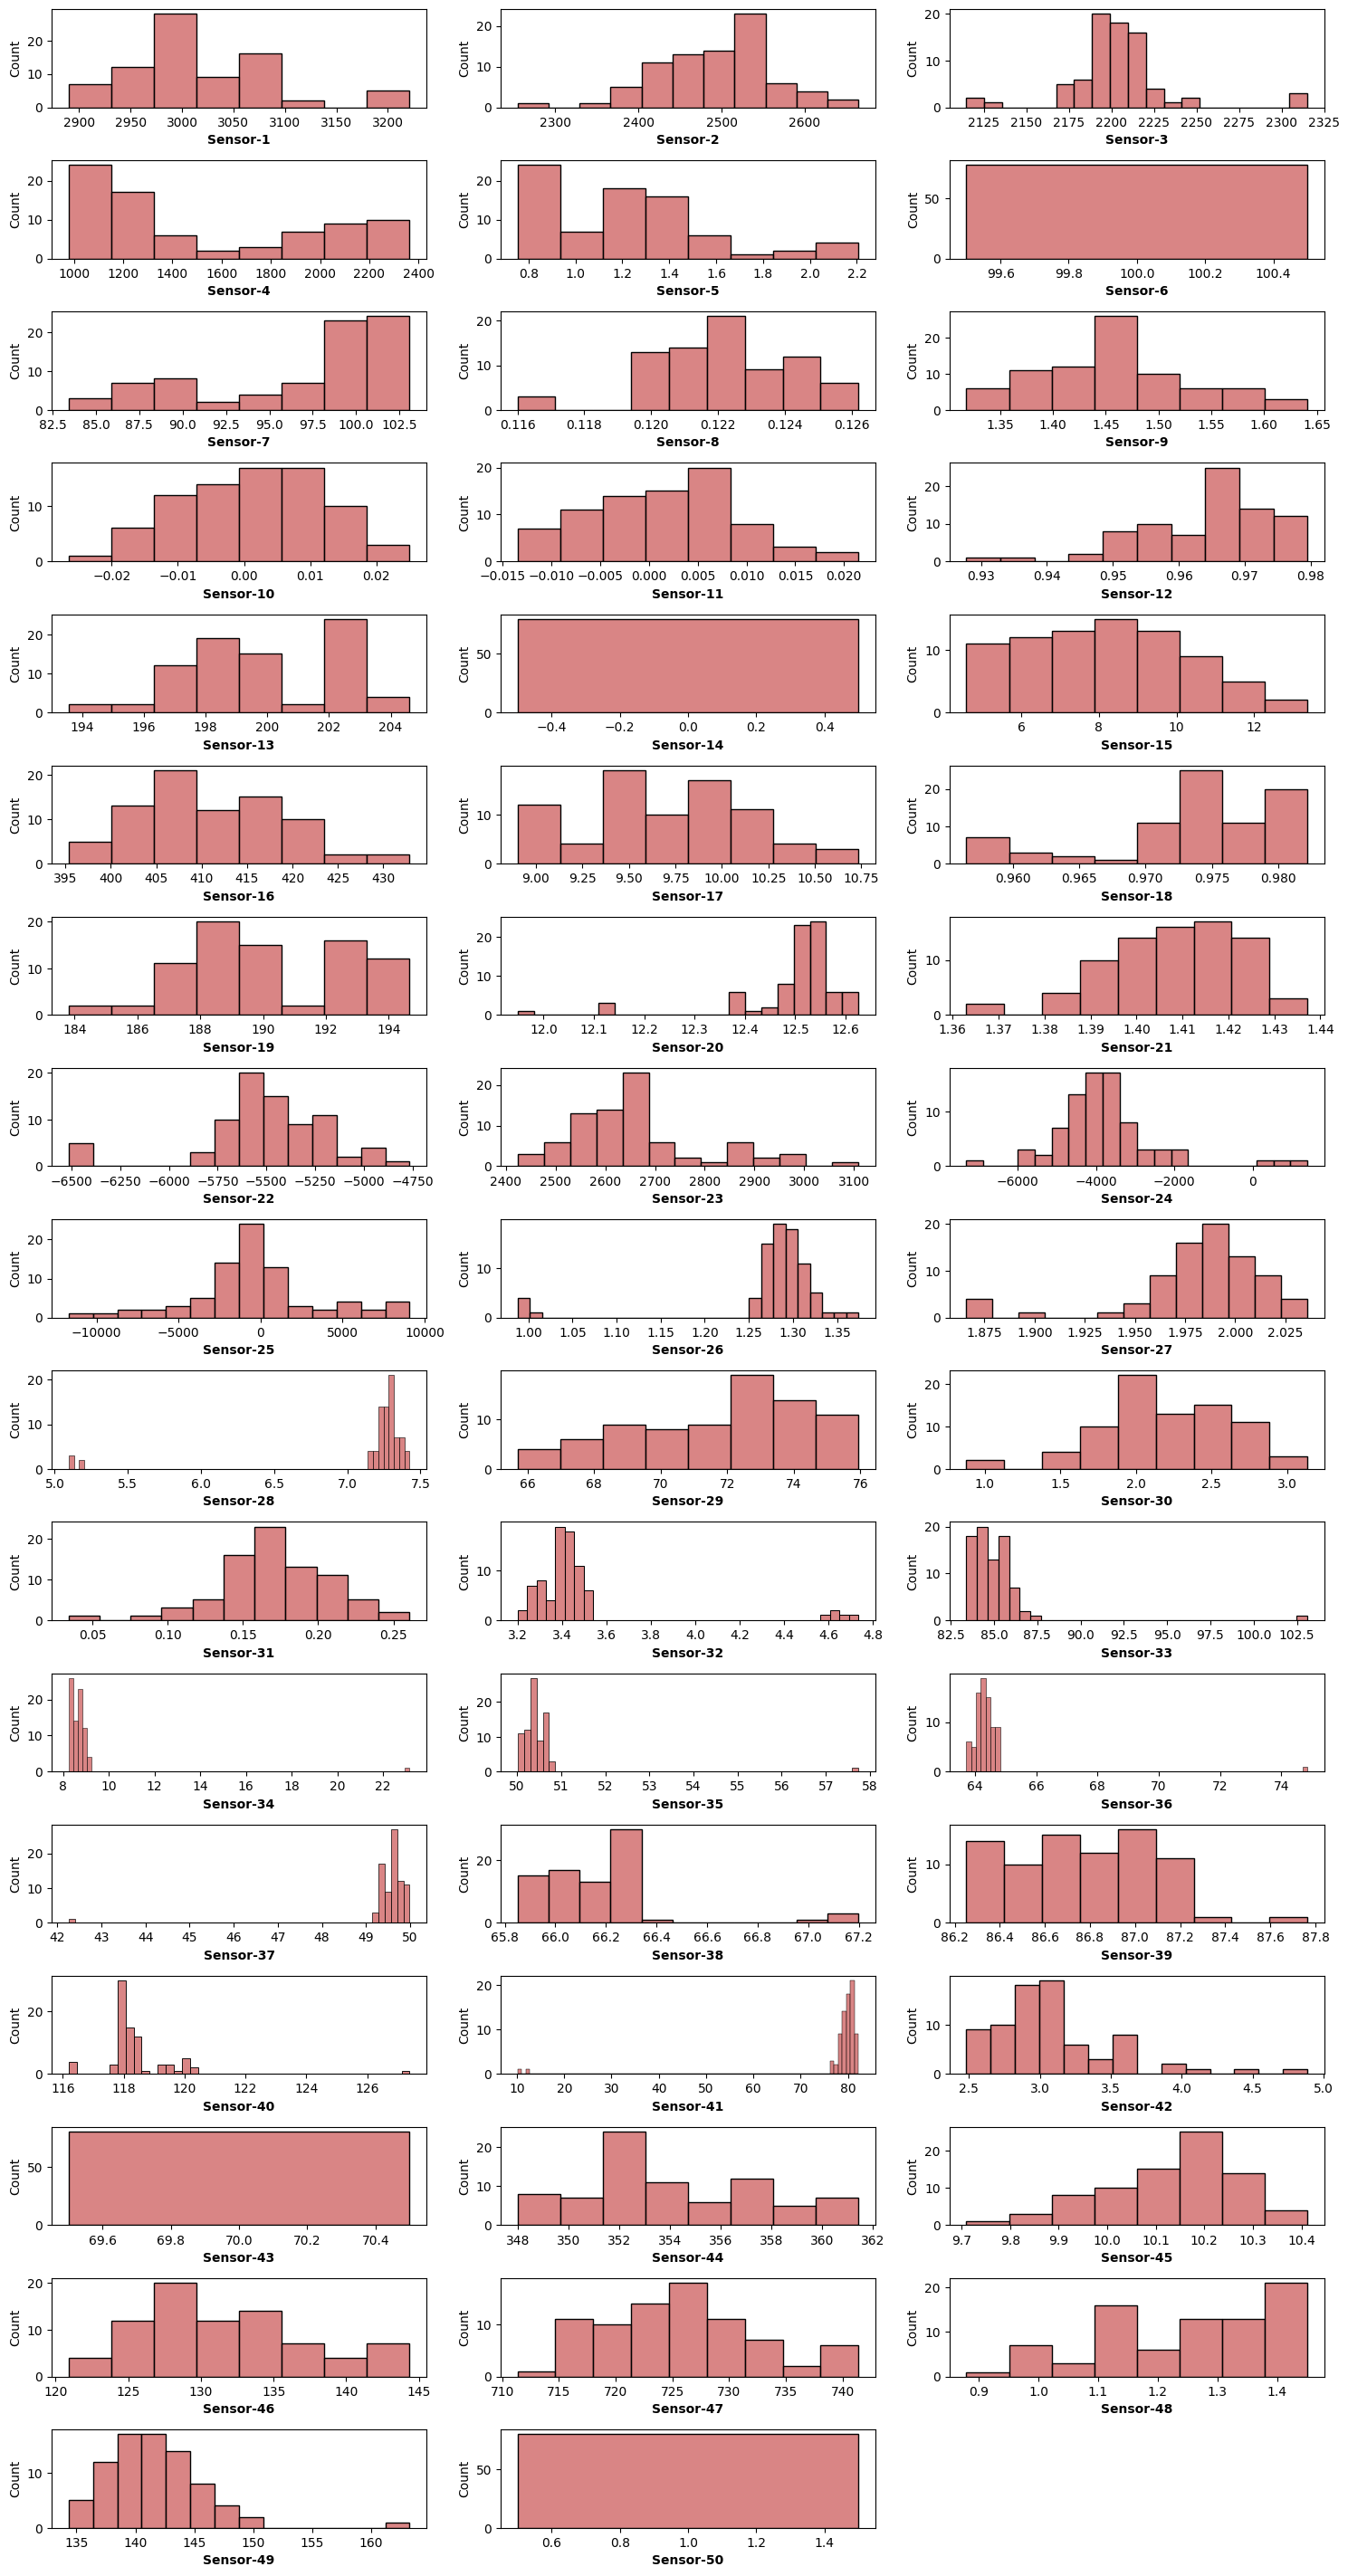

In [73]:
# let's have a look at the distribution first 50 sensors of Wafers
plt.figure(figsize=(15,100))

for i, col in enumerate(df.columns[1:51]):
    plt.subplot(60,3,i+1)
    sns.histplot(x=df[col],color="indianred")
    plt.xlabel(col,weight="bold")
    plt.tight_layout()

In [74]:
random_50_sensor  = []
for i in range(50):
    if i not in random_50_sensor:
        random_50_sensor.append(np.random.randint(1,591))

In [75]:
for i in random_50_sensor:
    print(df.columns[i])

Sensor-424
Sensor-326
Sensor-212
Sensor-280
Sensor-101
Sensor-399
Sensor-287
Sensor-101
Sensor-8
Sensor-140
Sensor-151
Sensor-98
Sensor-219
Sensor-162
Sensor-428
Sensor-40
Sensor-499
Sensor-230
Sensor-361
Sensor-154
Sensor-274
Sensor-47
Sensor-575
Sensor-358
Sensor-468
Sensor-492
Sensor-427
Sensor-502
Sensor-288
Sensor-100
Sensor-6
Sensor-376
Sensor-155
Sensor-162
Sensor-64
Sensor-131
Sensor-378
Sensor-93
Sensor-156
Sensor-221
Sensor-462
Sensor-263
Sensor-64
Sensor-287
Sensor-328
Sensor-142
Sensor-558
Sensor-99


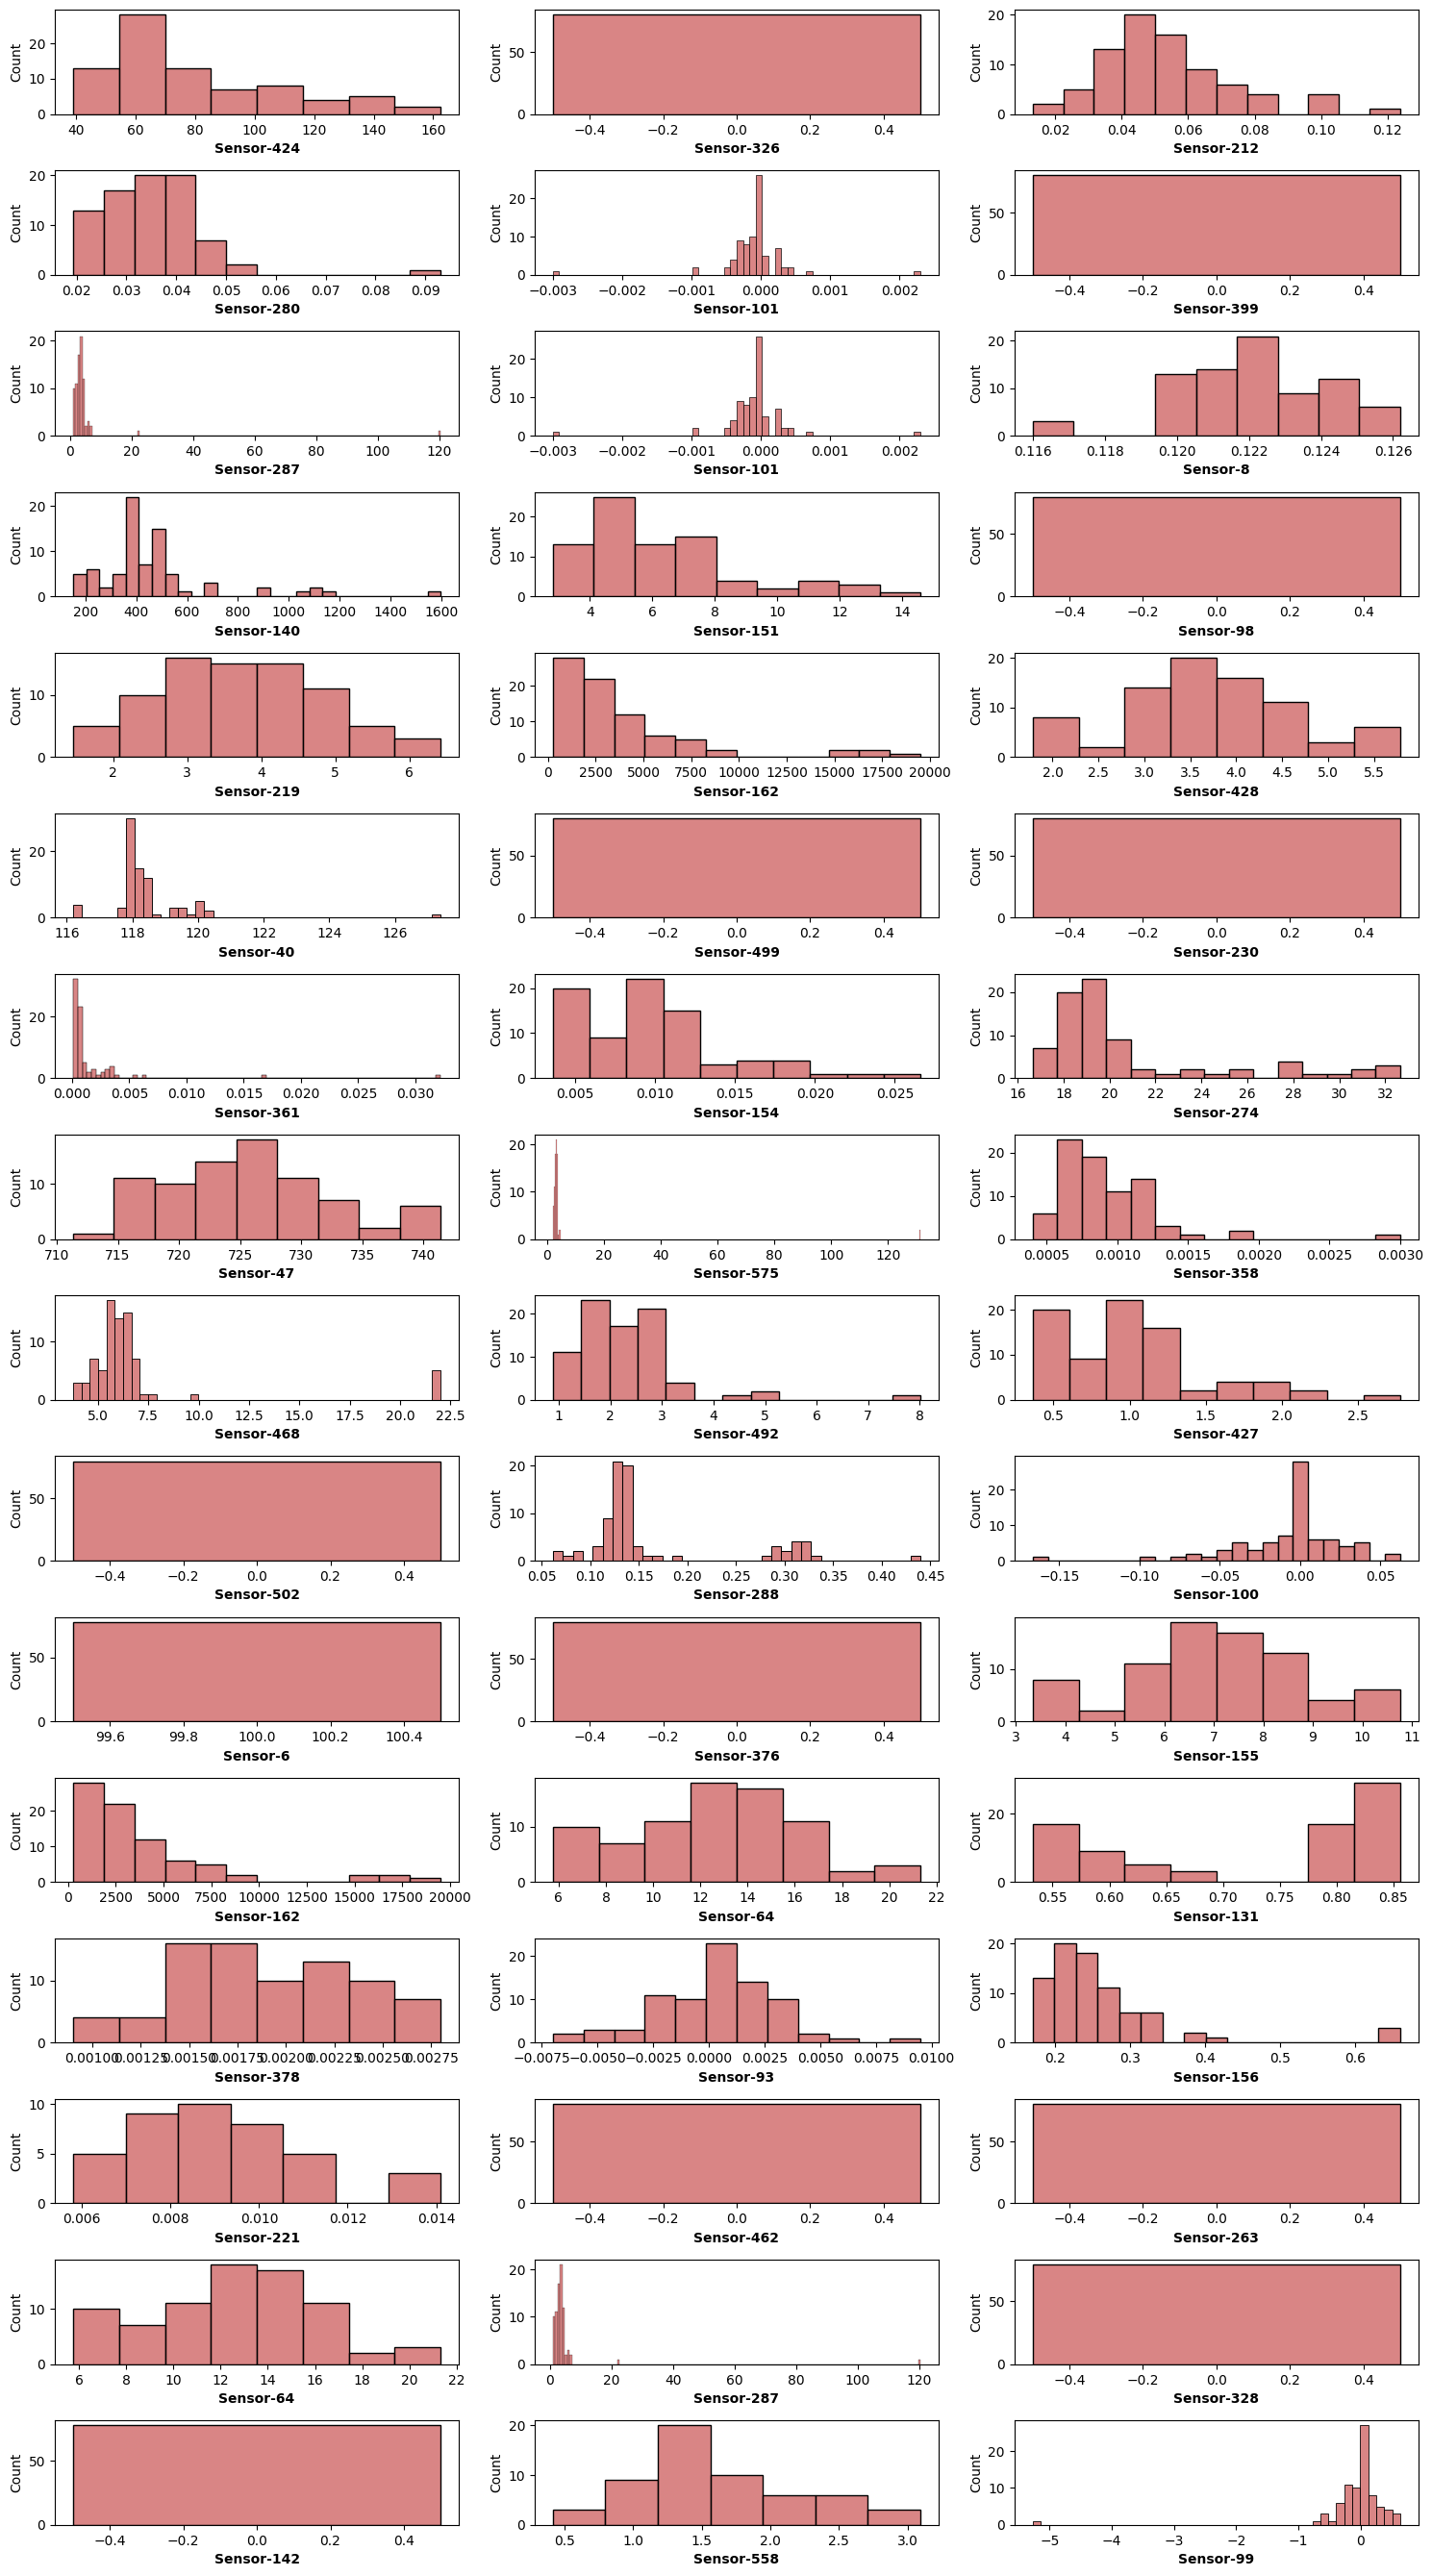

In [76]:
plt.figure(figsize=(15,100))

for i , col in enumerate(df.columns[random_50_sensor]):
    plt.subplot(60,3,i+1)
    sns.histplot(x=df[col],color="indianred")
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

In [77]:
def get_cols_zero_std(df:pd.DataFrame):
    cols_to_drop = []
    num_cols=[i for i in df.columns[1:] if df[i].dtype != "o"]
    for i in df.columns[1:]:
        if df[i].std() == 0:
            cols_to_drop.append(i)
    return cols_to_drop

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 55 to 51
Columns: 592 entries, Wafer to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 370.6+ KB


In [79]:
def get_reduntant_col(df: pd.DataFrame, missing_thresh = .7):
    cols_missing_ratio = df.isnull().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratio[cols_missing_ratio > missing_thresh].index)
    return cols_to_drop

In [80]:
df

,Wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,100.0,89.7222,0.1251,1.5762,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,100.0,102.3622,0.1208,1.4756,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.0,100.7744,0.1234,1.5590,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,100.0,99.2178,0.1221,1.4542,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.4958,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Wafer-861,3071.05,2642.15,2200.9889,1054.5240,1.3830,100.0,100.1800,0.1201,1.4532,...,NaN,0.4973,0.0139,0.0039,2.7851,0.0122,0.0131,0.0039,107.5257,-1
71,Wafer-872,3043.18,2545.53,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.3824,...,NaN,0.4989,0.0131,0.0036,2.6253,0.0218,0.0054,0.0020,24.6547,-1
14,Wafer-815,3001.26,2519.92,2224.6778,1308.6479,1.3907,100.0,101.1333,0.1208,1.5172,...,48.4818,0.4959,0.0142,0.0037,2.8609,0.0278,0.0135,0.0042,48.4818,-1
92,Wafer-893,3007.00,2572.62,2213.2111,2070.7147,1.9705,100.0,87.7411,0.1232,1.4446,...,NaN,0.4987,0.0172,0.0041,3.4417,0.0195,0.0149,0.0047,76.0035,-1


In [81]:
cols_drop_1 = get_cols_zero_std(df=df)
cols_drop_1

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [82]:
cols_drop_2 = get_reduntant_col(df,missing_thresh=.7)
cols_drop_2
    

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [83]:
cols_to_drop = cols_drop_1 + cols_drop_2 + ["Wafer"]
len(cols_to_drop)

127

In [84]:
df

,Wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,100.0,89.7222,0.1251,1.5762,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,100.0,102.3622,0.1208,1.4756,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.0,100.7744,0.1234,1.5590,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,100.0,99.2178,0.1221,1.4542,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.4958,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Wafer-861,3071.05,2642.15,2200.9889,1054.5240,1.3830,100.0,100.1800,0.1201,1.4532,...,NaN,0.4973,0.0139,0.0039,2.7851,0.0122,0.0131,0.0039,107.5257,-1
71,Wafer-872,3043.18,2545.53,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.3824,...,NaN,0.4989,0.0131,0.0036,2.6253,0.0218,0.0054,0.0020,24.6547,-1
14,Wafer-815,3001.26,2519.92,2224.6778,1308.6479,1.3907,100.0,101.1333,0.1208,1.5172,...,48.4818,0.4959,0.0142,0.0037,2.8609,0.0278,0.0135,0.0042,48.4818,-1
92,Wafer-893,3007.00,2572.62,2213.2111,2070.7147,1.9705,100.0,87.7411,0.1232,1.4446,...,NaN,0.4987,0.0172,0.0041,3.4417,0.0195,0.0149,0.0047,76.0035,-1


In [85]:
X,y = df.drop(cols_to_drop, axis=1), df['Good/Bad']

In [86]:
X

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,NaN,2532.45,2191.1333,2197.6570,1.1569,89.7222,0.1251,1.5762,0.0028,-0.0066,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,3221.21,2391.20,2189.9667,1046.6212,0.8662,102.3622,0.1208,1.4756,-0.0025,0.0025,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.7744,0.1234,1.5590,-0.0032,0.0135,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,2982.07,2447.06,2199.6334,1242.8420,1.4083,99.2178,0.1221,1.4542,0.0142,-0.0064,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,3058.08,2524.60,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.4958,0.0004,0.0037,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,3071.05,2642.15,2200.9889,1054.5240,1.3830,100.1800,0.1201,1.4532,0.0049,-0.0048,...,NaN,0.4973,0.0139,0.0039,2.7851,0.0122,0.0131,0.0039,107.5257,-1
71,3043.18,2545.53,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.3824,-0.0001,-0.0050,...,NaN,0.4989,0.0131,0.0036,2.6253,0.0218,0.0054,0.0020,24.6547,-1
14,3001.26,2519.92,2224.6778,1308.6479,1.3907,101.1333,0.1208,1.5172,-0.0135,0.0070,...,48.4818,0.4959,0.0142,0.0037,2.8609,0.0278,0.0135,0.0042,48.4818,-1
92,3007.00,2572.62,2213.2111,2070.7147,1.9705,87.7411,0.1232,1.4446,-0.0050,-0.0007,...,NaN,0.4987,0.0172,0.0041,3.4417,0.0195,0.0149,0.0047,76.0035,-1


In [87]:
X.shape

(80, 465)

In [88]:
y.shape

(80,)

In [89]:
y.value_counts()

Good/Bad
-1    74
 1     6
Name: count, dtype: int64

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer,KNNImputer

In [91]:
imputer = KNNImputer(n_neighbors=3)
prep_process = Pipeline(steps=[('Imputer',imputer),('Scaling',RobustScaler())])

In [92]:
prep_process

Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('Scaling', RobustScaler())])

In [93]:
X_train = prep_process.fit_transform(X)

In [94]:
X_train.shape

(80, 465)

In [95]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [96]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
import numpy as np
from typing import Tuple

def cluster_data_instances(X: np.array) -> Tuple[KMeans, np.array]:
    wcss = []  # Within Summation of Squares

    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    knee_finder = KneeLocator(
        range(1, 11), wcss, curve='convex', direction='decreasing')
    ideal_clusters = knee_finder.knee

    kmeans = KMeans(n_clusters=ideal_clusters, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    return kmeans, np.c_[X, y_kmeans]

# Usage example:
kmeans, X_clus = cluster_data_instances(X_train)


c:\Users\shrun\.conda\envs\butterfly\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrun\.conda\envs\butterfly\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrun\.conda\envs\butterfly\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrun\.conda\envs\butterfly\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will c

In [97]:
kmeans

KMeans(n_clusters=3, random_state=42)

In [98]:
X_clus

array([[-0.02781221,  0.37395233, -0.4289214 , ...,  0.75955556,
         0.        ,  1.        ],
       [ 2.50431022, -1.38644649, -0.47986463, ..., -0.52610857,
         0.        ,  1.        ],
       [-0.60204699,  0.28110298, -0.49685153, ..., -0.08775867,
         0.        ,  1.        ],
       ...,
       [-0.03223295,  0.21779093,  1.03590393, ..., -0.17805529,
         0.        ,  0.        ],
       [ 0.03396281,  0.87459106,  0.53517467, ...,  0.28421459,
         0.        ,  1.        ],
       [ 0.86164048,  0.3813055 , -0.59146288, ..., -0.20782888,
         0.        ,  1.        ]])

In [99]:
np.unique(X_clus[:,-1])

array([0., 1., 2.])

In [100]:
wafer_clus = np.c_[X_clus,y]
wafer_clus

array([[-0.02781221,  0.37395233, -0.4289214 , ...,  0.        ,
         1.        , -1.        ],
       [ 2.50431022, -1.38644649, -0.47986463, ...,  0.        ,
         1.        , -1.        ],
       [-0.60204699,  0.28110298, -0.49685153, ...,  0.        ,
         1.        , -1.        ],
       ...,
       [-0.03223295,  0.21779093,  1.03590393, ...,  0.        ,
         0.        , -1.        ],
       [ 0.03396281,  0.87459106,  0.53517467, ...,  0.        ,
         1.        , -1.        ],
       [ 0.86164048,  0.3813055 , -0.59146288, ...,  0.        ,
         1.        , -1.        ]])

In [101]:
wafer_clus[:,-2]

array([1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 2., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.])

In [102]:
wafer_clus[:,-2] == 0

array([False, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False,  True,  True, False, False])

In [103]:
wafer_clus[wafer_clus[:,-2] == 0].shape

(17, 467)

In [104]:
from im

SyntaxError: invalid syntax (2558257136.py, line 1)